In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image

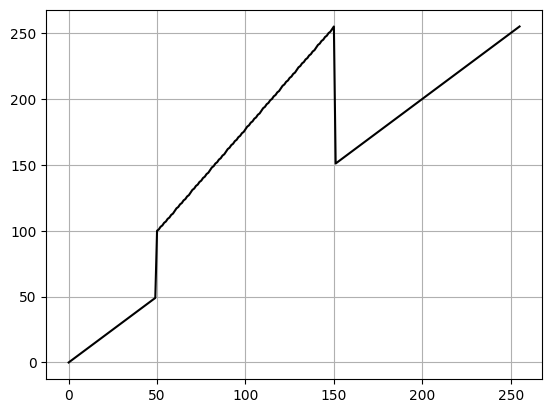

In [2]:
transform = np.arange(0, 256, 1).astype(np.uint8)
transform[50:151] = np.linspace(100, 255, 101).astype(np.uint8)
plt.plot(np.arange(0, 256), transform, color='black')
plt.grid()
plt.show()

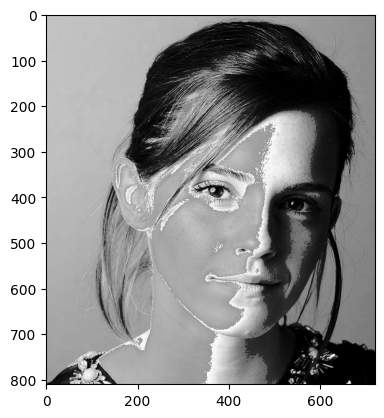

In [3]:
img = Image.open('a1images/emma.jpg')
img = cv.cvtColor(np.array(img), cv.COLOR_BGR2GRAY)
img = cv.LUT(img, transform)
plt.imshow(img, cmap='gray')
plt.show()

In [11]:
# %matplotlib tk
%matplotlib inline

(217, 181)


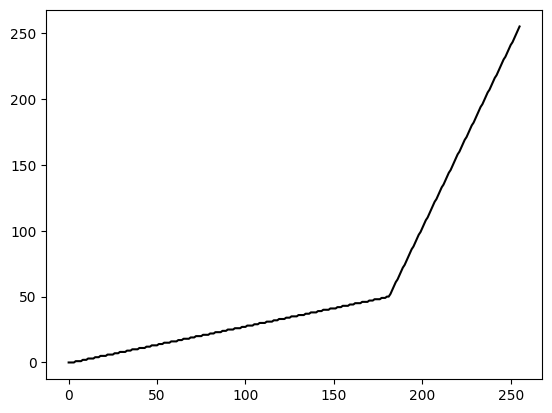

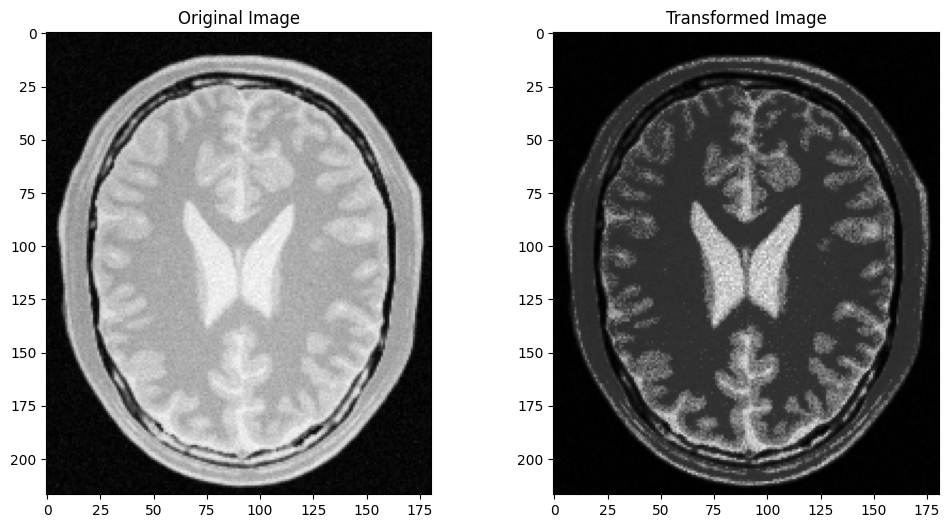

In [12]:

brain_scan = Image.open('a1images/brain_proton_density_slice.png')
brain_scan = np.array(brain_scan)
print(brain_scan.shape)

white_matter_transform = np.zeros((256,), dtype=np.uint8) + 255
white_matter_transform[0:181] = np.linspace(0, 50, 181).astype(np.uint8)
white_matter_transform[181:256] = np.linspace(50, 255, 75).astype(np.uint8)
white_matter = cv.LUT(brain_scan, white_matter_transform)

fig, axs = plt.subplots(1, 1)
axs.plot(np.arange(0, 256), white_matter_transform, color='black')   
plt.show()


afig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(brain_scan, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(white_matter, cmap='gray')
axs[1].set_title('Transformed Image')
plt.show()

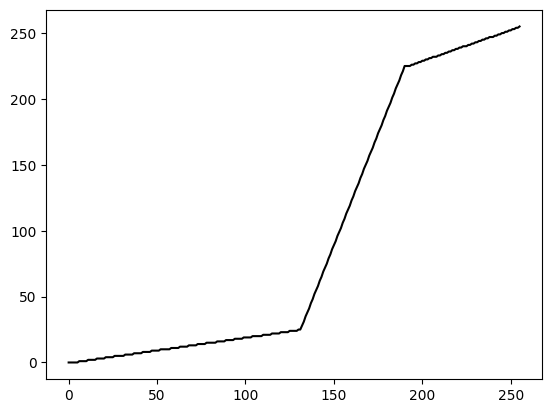

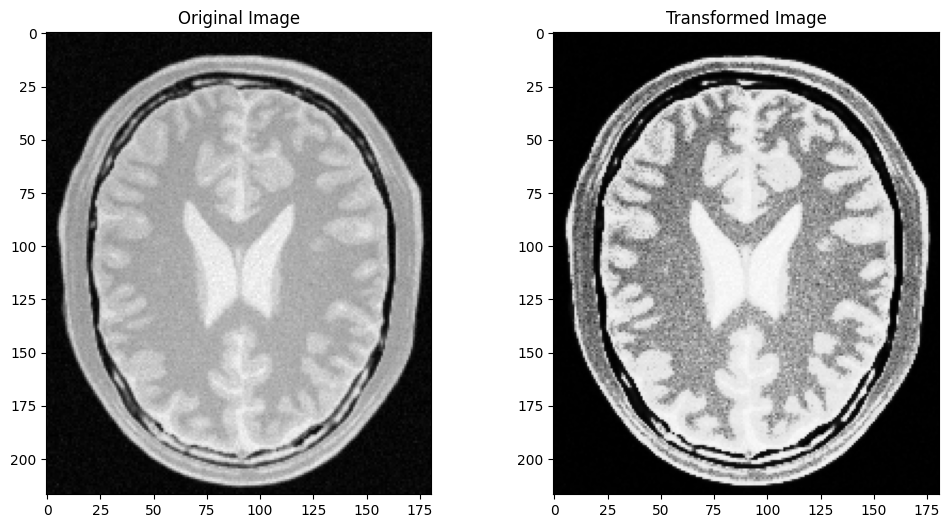

In [16]:
black_matter_transform = np.zeros((256,), dtype=np.uint8)
black_matter_transform[0:131] = np.linspace(0, 25, 131).astype(np.uint8)
black_matter_transform[131:191] = np.linspace(25, 225, 60).astype(np.uint8)
black_matter_transform[191:256] = np.linspace(225, 255, 65).astype(np.uint8)

black_matter = cv.LUT(brain_scan, black_matter_transform)

fig, axs = plt.subplots(1, 1)   
axs.plot(np.arange(0, 256), black_matter_transform, color='black')   
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(brain_scan, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(black_matter, cmap='gray')
axs[1].set_title('Transformed Image')
plt.show()

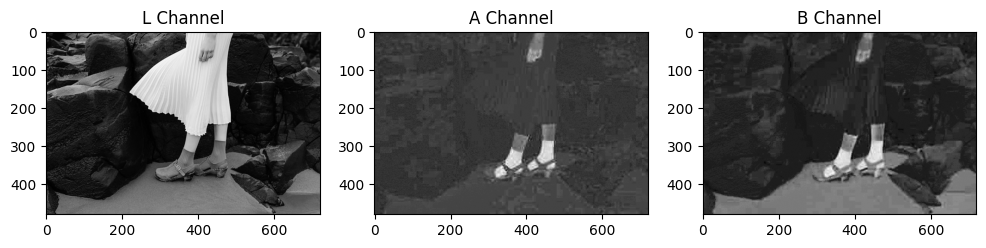

In [35]:
highlights_img = Image.open('a1images/highlights_and_shadows.jpg')

highlights_img = np.array(highlights_img)
highlights_img_lab = cv.cvtColor(highlights_img, cv.COLOR_RGB2Lab)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(highlights_img_lab[:, :, 0], cmap='gray')
axs[0].set_title('L Channel')
axs[1].imshow(highlights_img_lab[:, :, 1], cmap='gray')
axs[1].set_title('A Channel')
axs[2].imshow(highlights_img_lab[:, :, 2], cmap='gray')
axs[2].set_title('B Channel')   
plt.show()

Text(0.5, 1.0, 'Gamma Correction Table')

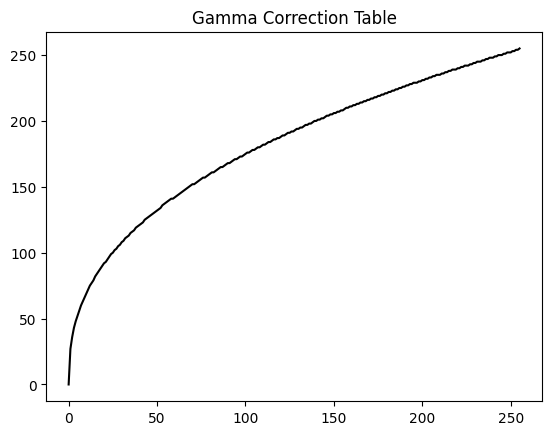

In [36]:
l = 2.5
inv_l = 1.0 / l
table = np.array([((i / 255.0) ** inv_l) * 255.0 for i in range(256)], dtype=np.uint8)

fig, axs = plt.subplots(1, 1)
axs.plot(np.arange(0, 256), table, color='black')
axs.set_title('Gamma Correction Table')

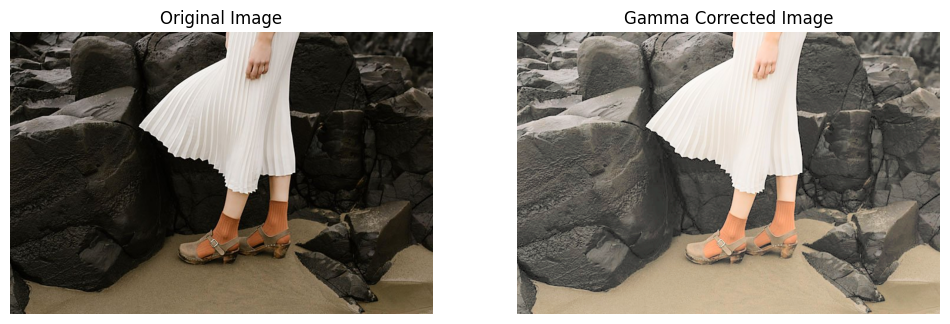

In [40]:
highlights_img_gc = highlights_img_lab.copy()
highlights_img_gc[:, :, 0] = cv.LUT(highlights_img_lab[:, :, 0], table)


highlights_img_gc = cv.cvtColor(highlights_img_gc, cv.COLOR_Lab2RGB)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(highlights_img)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(highlights_img_gc)
axs[1].set_title('Gamma Corrected Image')
plt.axis('off')
plt.show()


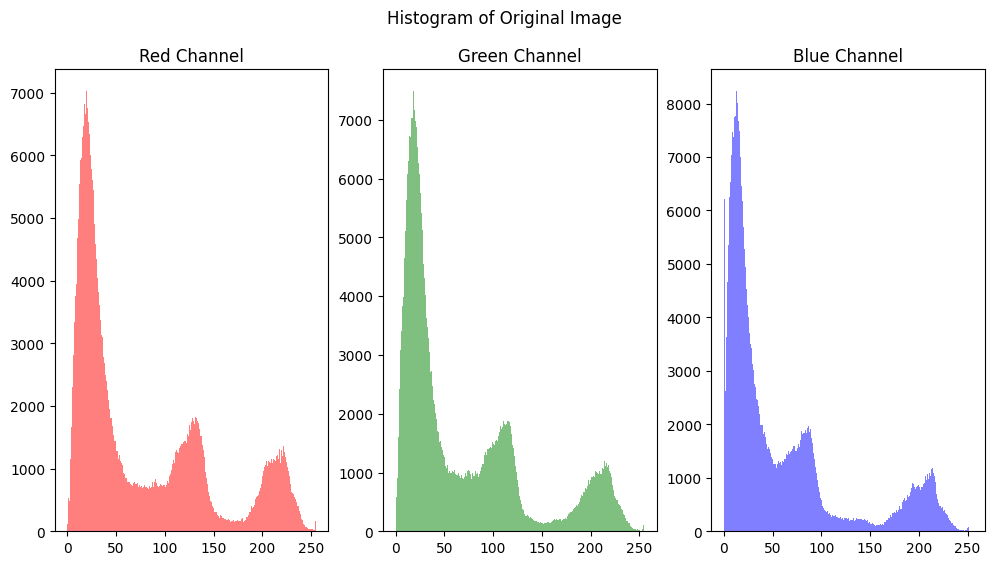

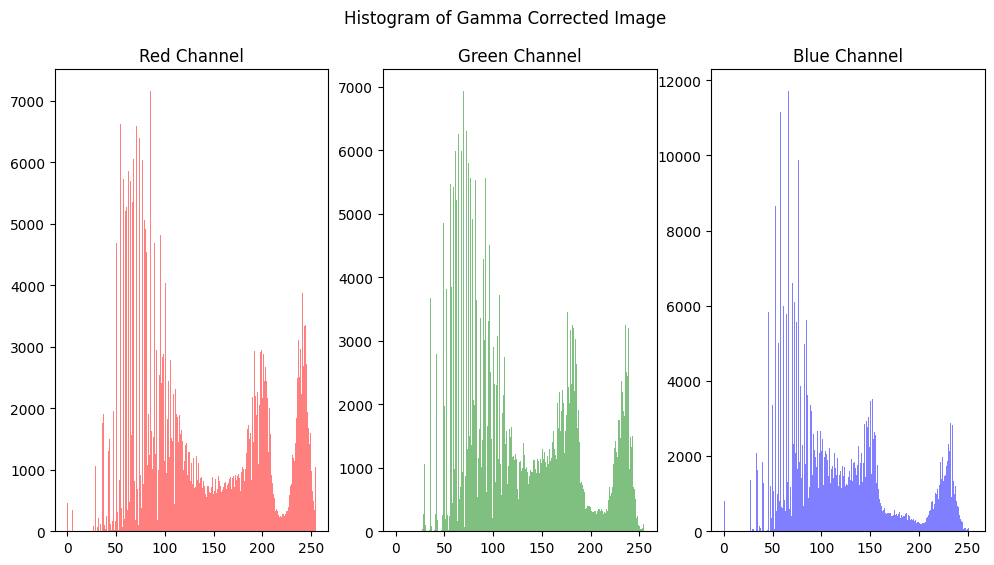

In [43]:
# histogram of the original image
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].hist(highlights_img[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('Red Channel')
axs[1].hist(highlights_img[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
axs[1].set_title('Green Channel')
axs[2].hist(highlights_img[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
axs[2].set_title('Blue Channel')
plt.suptitle('Histogram of Original Image')
plt.show()

# histogram of the gamma corrected image
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].hist(highlights_img_gc[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('Red Channel')
axs[1].hist(highlights_img_gc[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
axs[1].set_title('Green Channel')
axs[2].hist(highlights_img_gc[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
axs[2].set_title('Blue Channel')
plt.suptitle('Histogram of Gamma Corrected Image')
plt.show()

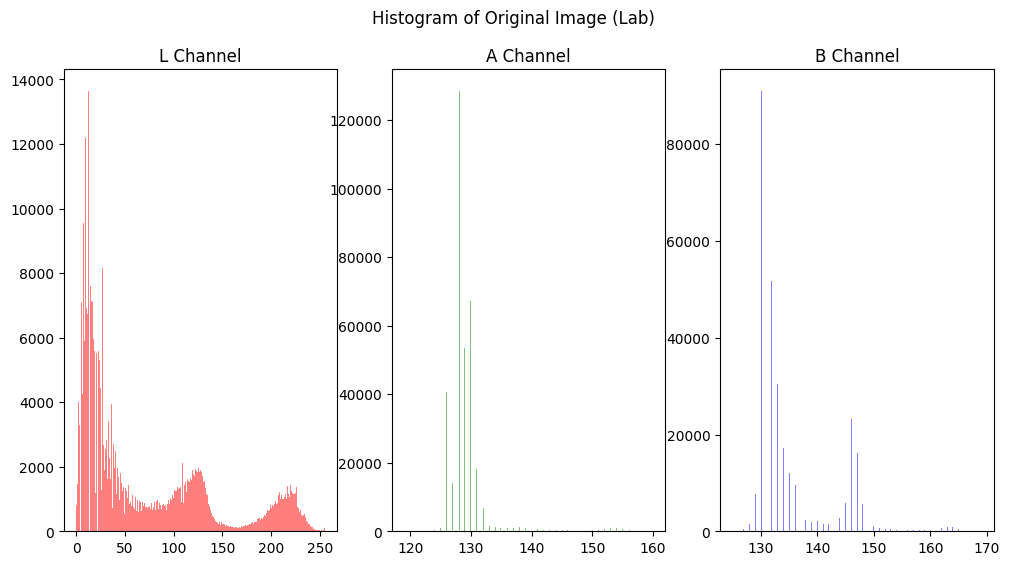

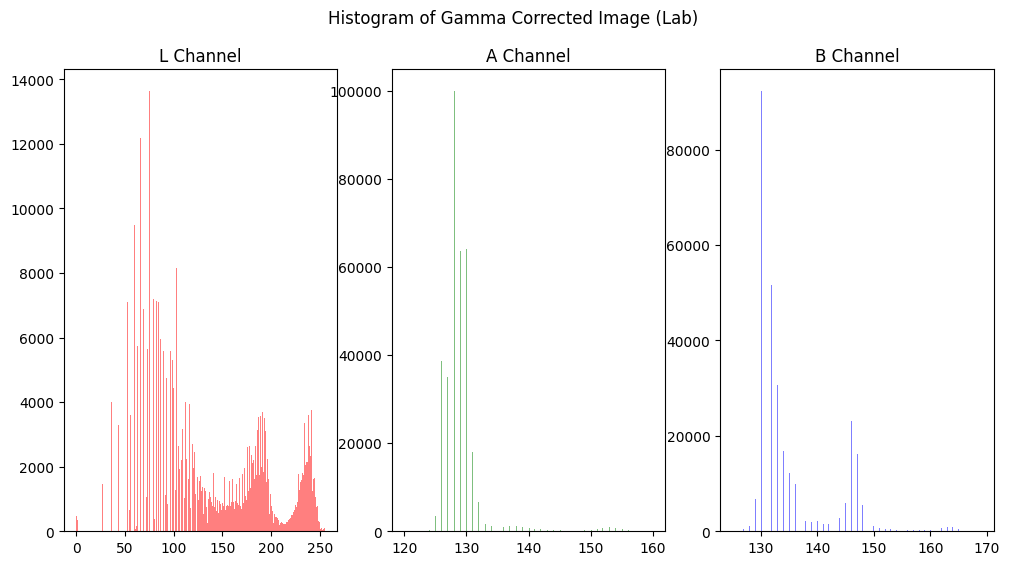

In [44]:
# histogram of the original image (Lab)
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].hist(highlights_img_lab[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('L Channel')
axs[1].hist(highlights_img_lab[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
axs[1].set_title('A Channel')
axs[2].hist(highlights_img_lab[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
axs[2].set_title('B Channel')
plt.suptitle('Histogram of Original Image (Lab)')
plt.show()

# histogram of the gamma corrected image (Lab)
highlights_img_gc_lab = cv.cvtColor(highlights_img_gc, cv.COLOR_RGB2Lab)    
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].hist(highlights_img_gc_lab[:, :, 0].ravel(), bins=256, color='red', alpha=0.5)
axs[0].set_title('L Channel')
axs[1].hist(highlights_img_gc_lab[:, :, 1].ravel(), bins=256, color='green', alpha=0.5)
axs[1].set_title('A Channel')
axs[2].hist(highlights_img_gc_lab[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5)
axs[2].set_title('B Channel')
plt.suptitle('Histogram of Gamma Corrected Image (Lab)')
plt.show()

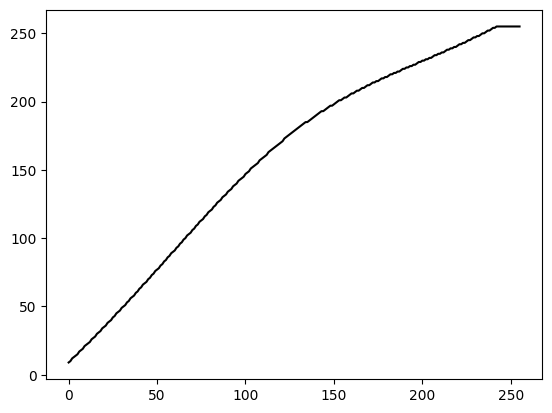

In [48]:
def get_intensity_transform(a, sigma):
    def intensity_transform(x):
        return min((int(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)))), 255)
    return intensity_transform

f = get_intensity_transform(0.4, 70)
transform = np.array([f(i) for i in range(256)], dtype=np.uint8)
plt.plot(np.arange(0, 256), transform, color='black')
plt.show()

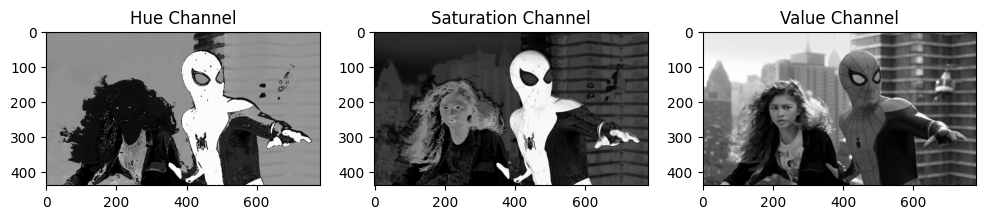

In [49]:
spider_img = Image.open('a1images/spider.png')

spider_img = np.array(spider_img)
spider_img_hsv = cv.cvtColor(spider_img, cv.COLOR_RGB2HSV)

# Display the hue, saturation, and value components
hue_channel = spider_img_hsv[:, :, 0]
saturation_channel = spider_img_hsv[:, :, 1]
value_channel = spider_img_hsv[:, :, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(hue_channel, cmap='gray')
axs[0].set_title('Hue Channel')
axs[1].imshow(saturation_channel, cmap='gray')
axs[1].set_title('Saturation Channel')
axs[2].imshow(value_channel, cmap='gray')
axs[2].set_title('Value Channel')
plt.show()

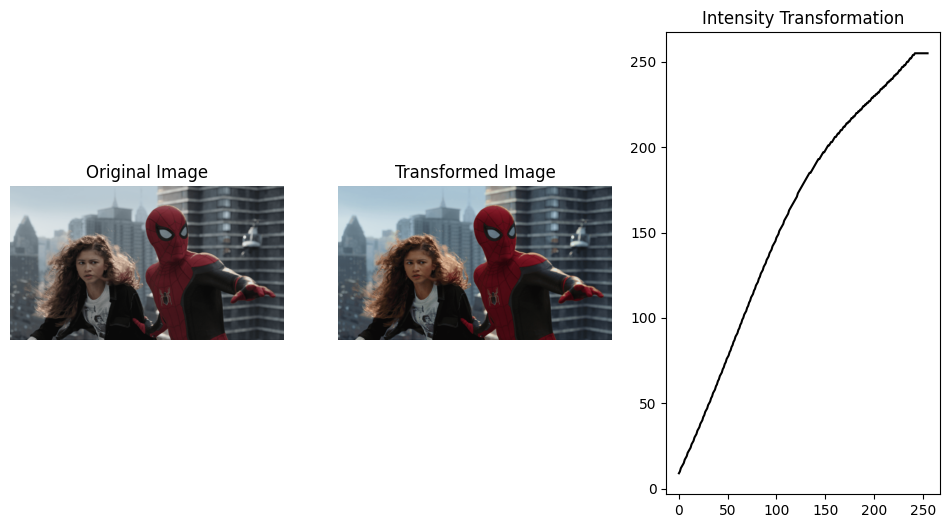

In [50]:
spider_img_transformed_hsv = spider_img_hsv.copy()
spider_img_transformed_hsv[:, :, 1] = cv.LUT(spider_img_transformed_hsv[:, :, 1], transform)
spider_img_transformed = cv.cvtColor(spider_img_transformed_hsv, cv.COLOR_HSV2RGB)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
axs[0].imshow(spider_img)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(spider_img_transformed)
axs[1].set_title('Transformed Image')
axs[1].axis('off')
axs[2].plot(np.arange(0, 256), transform, color='black')
axs[2].set_title('Intensity Transformation')
plt.show()